#Analisis Exploratorio

In [53]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("janiobachmann/bank-marketing-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'bank-marketing-dataset' dataset.
Path to dataset files: /kaggle/input/bank-marketing-dataset


In [54]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os



# Revisar los archivos descargados
print(os.listdir(path))

df = pd.read_csv(os.path.join(path, "bank.csv"))

['bank.csv']


##Descipción de las Variables

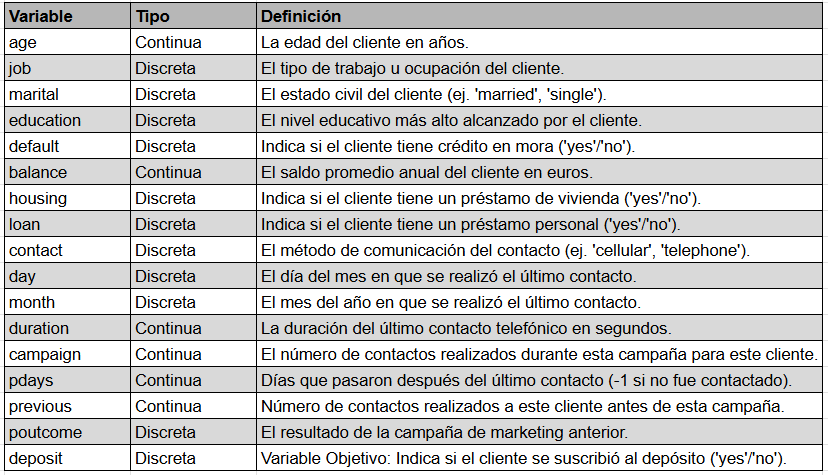

In [55]:
df.head(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes


In [56]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


##Fase de Limieza

###Valores Nulos

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Todas las columnas tienen 11162 non-null, lo que significa que el dataset no tiene vaores nulos

###Valores 'unknown'

Conteo de valores 'unknown' por columna categórica

In [58]:
categorical_cols = df.select_dtypes(include=['object']).columns
unknown_counts = {}
for col in categorical_cols:
    count = (df[col] == 'unknown').sum()
    if count > 0:
        unknown_counts[col] = count

if unknown_counts:
    for col, count in unknown_counts.items():
        percentage = (count / len(df)) * 100
        print(f"Columna '{col}': {count} valores 'unknown' ({percentage:.2f}%)")
else:
    print("No se encontraron valores 'unknown' en las columnas categóricas.")

Columna 'job': 70 valores 'unknown' (0.63%)
Columna 'education': 497 valores 'unknown' (4.45%)
Columna 'contact': 2346 valores 'unknown' (21.02%)
Columna 'poutcome': 8326 valores 'unknown' (74.59%)


El tratamiento de los valores "unknown" se decide columna por columna, ya que cada una representa un caso diferente. Por eso:

Para job y education, al tener un porcentaje muy bajo de "unknowns" (0.63% y 4.45% respectivamente), estos se reemplazan por el valor más común (la moda) para no perder los datos de esas filas.

En contact, el porcentaje es más significativo (21%). Por ello, se mantiene "unknown" como una tercera categoría para analizar si este grupo se comporta de manera distinta.

Finalmente, en poutcome, el altísimo porcentaje de "unknowns" (74.6%) no es un error, sino un dato clave, representa a los clientes que nunca antes habían sido contactados. Por lo tanto, se conserva como una categoría fundamental para el análisis.

In [59]:
# Limpieza de'job'
# Calcular la el valor más frecuent
job_mode = df['job'].mode()[0]
print(f"La moda para 'job' es: '{job_mode}'")

# Reemplazar 'unknown' con la moda
df['job'] = df['job'].replace('unknown', job_mode)
print("Valores 'unknown' en 'job' reemplazados con la moda.")

# Limpieza de 'education'
# Calcular la moda
education_mode = df['education'].mode()[0]
print(f"\nLa moda para 'education' es: '{education_mode}'")

# Reemplazar 'unknown' con la moda
df['education'] = df['education'].replace('unknown', education_mode)
print("Valores 'unknown' en 'education' reemplazados con la moda.")

print(f"\nValores 'unknown' en 'job' después de la limpieza: {(df['job'] == 'unknown').sum()}")
print(f"Valores 'unknown' en 'education' después de la limpieza: {(df['education'] == 'unknown').sum()}")

La moda para 'job' es: 'management'
Valores 'unknown' en 'job' reemplazados con la moda.

La moda para 'education' es: 'secondary'
Valores 'unknown' en 'education' reemplazados con la moda.

Valores 'unknown' en 'job' después de la limpieza: 0
Valores 'unknown' en 'education' después de la limpieza: 0


##Fase de descubrimiento

### Análisis Univariado

#### Análisis de la Variable Objetivo "deposit"

si el cliente  ha suscrito un depósito a plazo ("yes" o "no").

/tmp/ipython-input-1362260491.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='deposit', data=df, palette='viridis', order=['yes', 'no'])


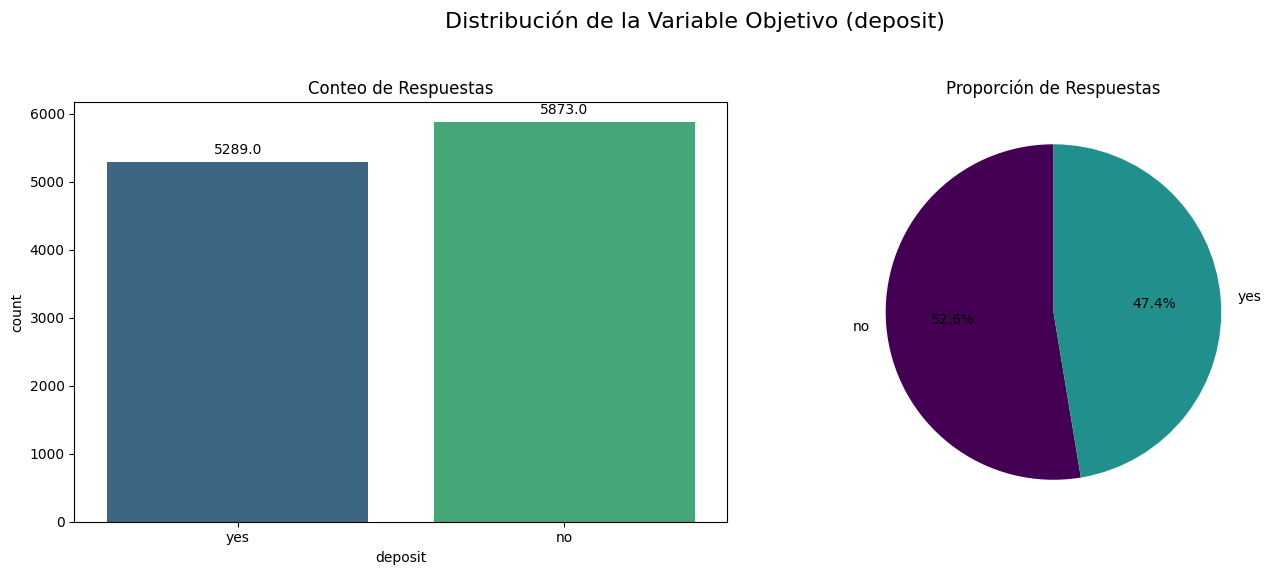

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Distribución de la Variable Objetivo (deposit)', fontsize=16)

# Gráfico de Barras (Conteo)
sns.countplot(ax=axes[0], x='deposit', data=df, palette='viridis', order=['yes', 'no'])
axes[0].set_title('Conteo de Respuestas')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# Gráfico de Torta (Proporción)
deposit_counts = df['deposit'].value_counts()
axes[1].pie(deposit_counts, labels=deposit_counts.index, autopct='%1.1f%%', startangle=90, colors=['#440154', '#21908d'])
axes[1].set_title('Proporción de Respuestas')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



####Análisis de las Variables Numéricas Continuas

#####Variable "balance"

El saldo promedio anual del cliente en euros.

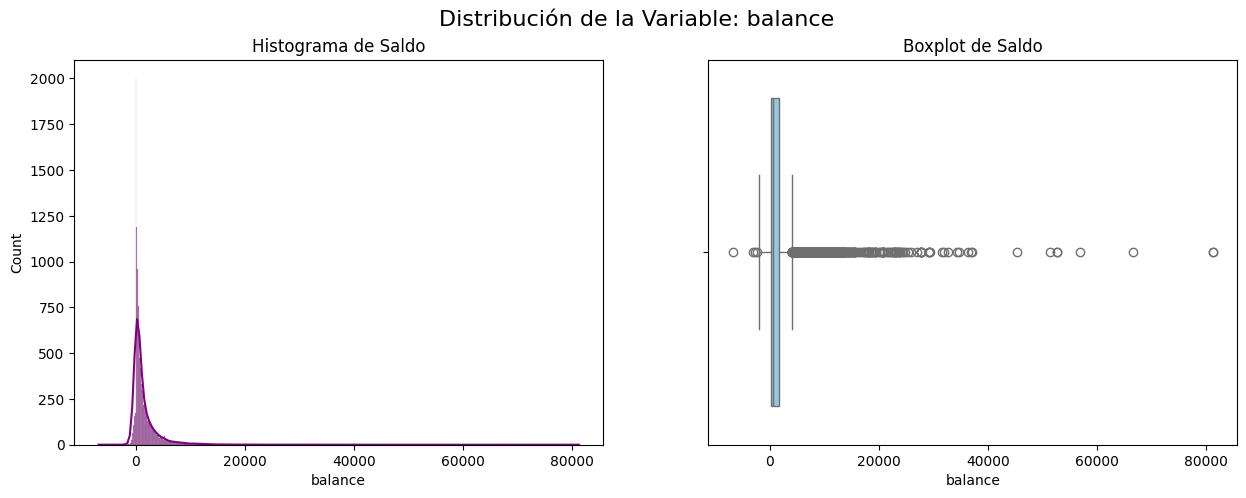

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Distribución de la Variable: balance', fontsize=16)

# Histograma
sns.histplot(ax=axes[0], data=df, x='balance', kde=True, color='purple')
axes[0].set_title('Histograma de Saldo')

# Boxplot
sns.boxplot(ax=axes[1], data=df, x='balance', color='skyblue')
axes[1].set_title('Boxplot de Saldo')

plt.show()

###### Detección de atípicos para balance

Técnica 1: Rango Intercuantílico (IQR)

In [62]:
variable_a_analizar = 'balance'

# Primero Calculamos los cuartiles Q1 y Q3
Q1 = df[variable_a_analizar].quantile(0.25)
Q3 = df[variable_a_analizar].quantile(0.75)
IQR = Q3 - Q1

# Luego  Definir los límites para detectar atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Cuartil 1 (Q1): {Q1}")
print(f"Cuartil 3 (Q3): {Q3}")
print(f"Rango Intercuartílico (IQR): {IQR}")
print(f"Límite inferior para atípicos: {limite_inferior}")
print(f"Límite superior para atípicos: {limite_superior}")

#Identifico los atípicos
atipicos = df[(df[variable_a_analizar] < limite_inferior) | (df[variable_a_analizar] > limite_superior)]

print(f"\nNúmero total de atípicos detectados: {len(atipicos)}")
print(f"Porcentaje de datos atípicos: {(len(atipicos) / len(df)) * 100:.2f}%")


Cuartil 1 (Q1): 122.0
Cuartil 3 (Q3): 1708.0
Rango Intercuartílico (IQR): 1586.0
Límite inferior para atípicos: -2257.0
Límite superior para atípicos: 4087.0

Número total de atípicos detectados: 1055
Porcentaje de datos atípicos: 9.45%


Técnica 2: Puntuación Z (Z-SCORE)

Se analisara con el z-score a pesar de que el histograma no muestra distribución normal con el proposito de comparar los resultados obtenidos

In [63]:
# Importamos la librería necesaria para cálculos estadísticos
from scipy import stats
import numpy as np

# Seleccionamos la variable a analizar
variable_a_analizar = 'balance'

# Calculamos el Z-score para cada punto de la columna 'balance'
# Usamos np.abs() para trabajar con los valores absolutos, ya que no nos importa la dirección
z_scores = np.abs(stats.zscore(df[variable_a_analizar]))

# Definimos un umbral. usaremos lo mas comun que es 3, lo que significa que cualquier valor que esté a más de 3 desviaciones estándar de la media es un atípico.
umbral = 3

#Identificamos los atípicos que superan el umbral
atipicos_z = df[z_scores > umbral]

# 4. Mostrar resultados
print(f"Umbral de Z-score definido: {umbral}")
print(f"Número total de atípicos detectados: {len(atipicos_z)}")
print(f"Porcentaje de datos atípicos: {(len(atipicos_z) / len(df)) * 100:.2f}%")

Umbral de Z-score definido: 3
Número total de atípicos detectados: 173
Porcentaje de datos atípicos: 1.55%


Interpretación

Tras aplicar las técnicas de IQR y Z-Score en la variable balance, se detectaron 1055 y 173 valores atípicos, respectivamente. Aunque estos valores son estadísticamente raros, no los considerare errores ya que representan a un segmento real de clientes con un alto poder adquisitivo.

Eliminar a estos clientes significaría perder información valiosa sobre el comportamiento de los clientes más ricos del banco, quienes podrían ser un objetivo clave para productos de inversión por lo se decide mantener todos los datos atípicos para el análisis bivariado.



#####Variable "age"

 La edad del cliente en años.

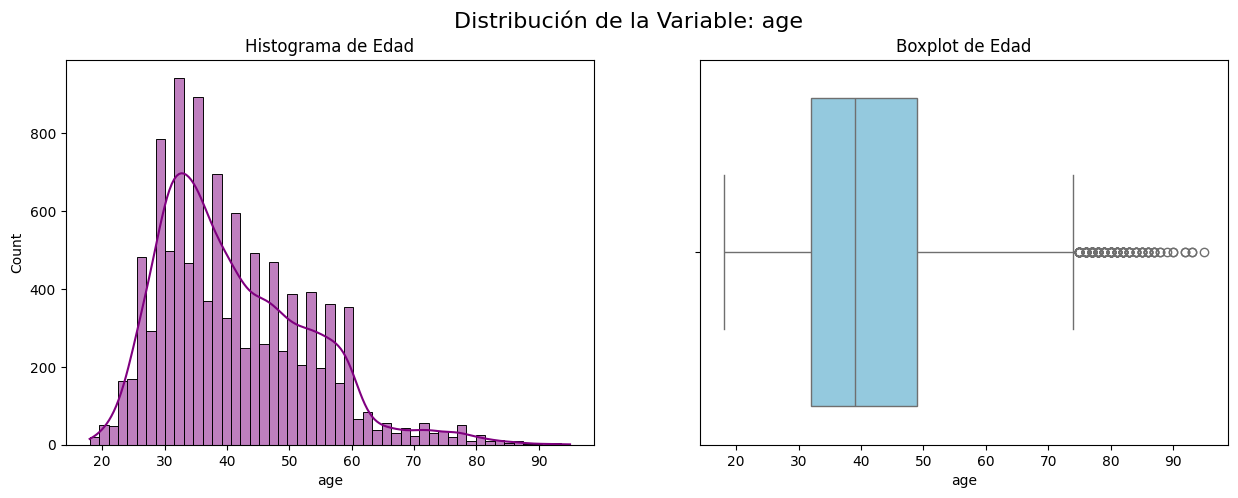

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Distribución de la Variable: age', fontsize=16)

# Histograma
sns.histplot(ax=axes[0], data=df, x='age', kde=True, color='purple')
axes[0].set_title('Histograma de Edad')

# Boxplot
sns.boxplot(ax=axes[1], data=df, x='age', color='skyblue')
axes[1].set_title('Boxplot de Edad')

plt.show()

Al analizar la variable age, el boxplot muestra muy pocos valores atípicos, ubicados en el extremo superior. Estos puntos no se consideran errores, ya que representan a los clientes de mayor edad del banco, como personas jubiladas de más de 80 años.

Por lo que se decide mantener todos los datos al ser representativos de un segmento demográfico real.

#####Variable "duration"

La duración del último contacto en segundos.

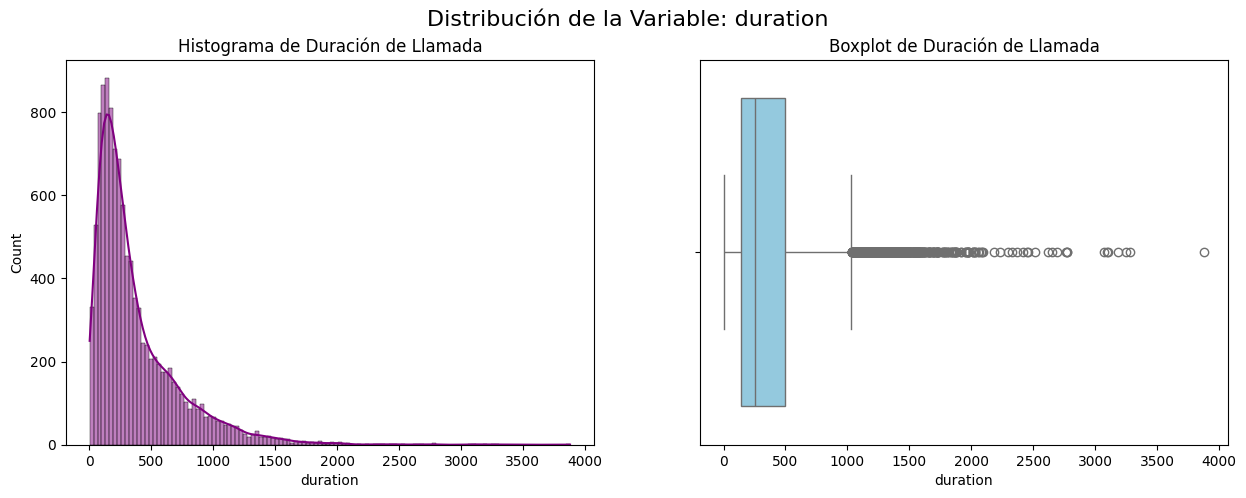

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Distribución de la Variable: duration', fontsize=16)

# Histograma
sns.histplot(ax=axes[0], data=df, x='duration', kde=True, color='purple')
axes[0].set_title('Histograma de Duración de Llamada')

# Boxplot
sns.boxplot(ax=axes[1], data=df, x='duration', color='skyblue')
axes[1].set_title('Boxplot de Duración de Llamada')

plt.show()

En el caso de duration, los valores atípicos se observan en el extremo superior, representando llamadas inusualmente largas. No los considero errores, estos datos proporcionan informacion de alto valor: una llamada muy larga suele indicar un alto nivel de interés por parte del cliente. Por otro lado, no se observan atípicos en el extremo inferior. Por lo tanto, se mantienen todos los valores ya que los datos extremos son indicativos de un comportamiento relevante para el análisis.

#####Variable "pdays"

El número de días que han pasado desde que el cliente fue contactado por última vez en una campaña anterior.

El análisis de pdays se hace diferente porque esa columna mezcla dos tipos de información.

En nuestro caso, pdays tiene el código -1 para los "clientes nuevos" y un número de días para los "clientes recurrentes". Por eso, primero los separamos para poder analizar cada grupo correctamente sin que el -1 distorsione todo el gráfico.

Número de clientes contactados previamente: 2838
Número de clientes nuevos (no contactados previamente): 8324

Distribución de 'pdays' (solo para clientes contactados previamente)


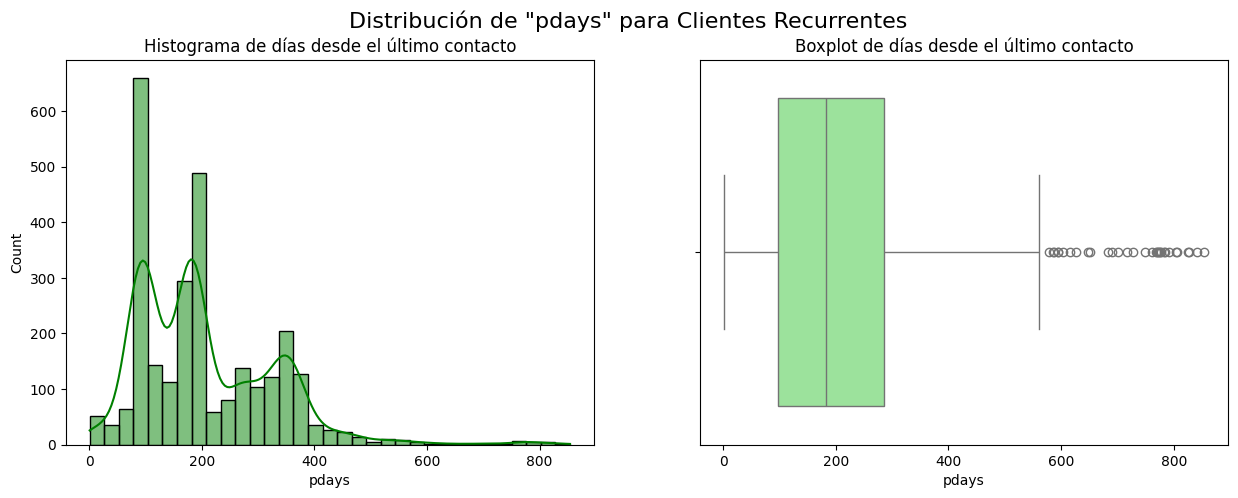

In [66]:
# Separar el dataset en dos grupos
contacted_before = df[df['pdays'] != -1]
not_contacted_before = df[df['pdays'] == -1]

print(f"Número de clientes contactados previamente: {len(contacted_before)}")
print(f"Número de clientes nuevos (no contactados previamente): {len(not_contacted_before)}")

# Analizar SÓLO el grupo de clientes que sí fueron contactados
print("\nDistribución de 'pdays' (solo para clientes contactados previamente)")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Distribución de "pdays" para Clientes Recurrentes', fontsize=16)

# Histograma para 'pdays' de clientes contactados
sns.histplot(ax=axes[0], data=contacted_before, x='pdays', kde=True, color='green')
axes[0].set_title('Histograma de días desde el último contacto')

# Boxplot para 'pdays' de clientes contactados
sns.boxplot(ax=axes[1], data=contacted_before, x='pdays', color='lightgreen')
axes[1].set_title('Boxplot de días desde el último contacto')

plt.show()

Como se discutió previamente, pdays es una variable especial. Al analizar únicamente el subconjunto de clientes contactados previamente (pdays diferente de -1), los valores atípicos en el extremo superior simplemente representan a clientes que no han sido contactados en mucho tiempo. Esta información es valiosa para entender el ciclo de vida, por lo que se decide mantener todos los datos sin modificación.

####Análisis de las Variables Numéricas Categoricas

1. job: El tipo de trabajo del cliente (ej: "management", "technician", "student", "unemployed", etc.).

2. marital: El estado civil del cliente (ej: "married", "single", "divorced").

3. education: El nivel educativo más alto del cliente (ej: "primary", "secondary", "tertiary", "unknown").

4. default: Indica si el cliente tiene crédito en mora ("yes" o "no").

5. housing: Indica si el cliente tiene un préstamo de vivienda ("yes" o "no").

6. loan: Indica si el cliente tiene un préstamo personal ("yes" o "no").

7. contact: El método de comunicación utilizado para contactar al cliente (ej: "cellular", "telephone", "unknown").

8. month: El mes del año en que se realizó el último contacto (ej: "jan", "feb", "mar", etc.).

9. poutcome: Resultado de la campaña anterior (ej: "success ", "other  ", "unknown ").

A continuación, se realiza un análisis univariado para las variables categóricas. Estos gráficos nos permiten observar cómo se distribuyen los clientes a través de las diferentes categorías,

/tmp/ipython-input-4226927667.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=feature, order=df[feature].value_counts().index, palette='plasma')


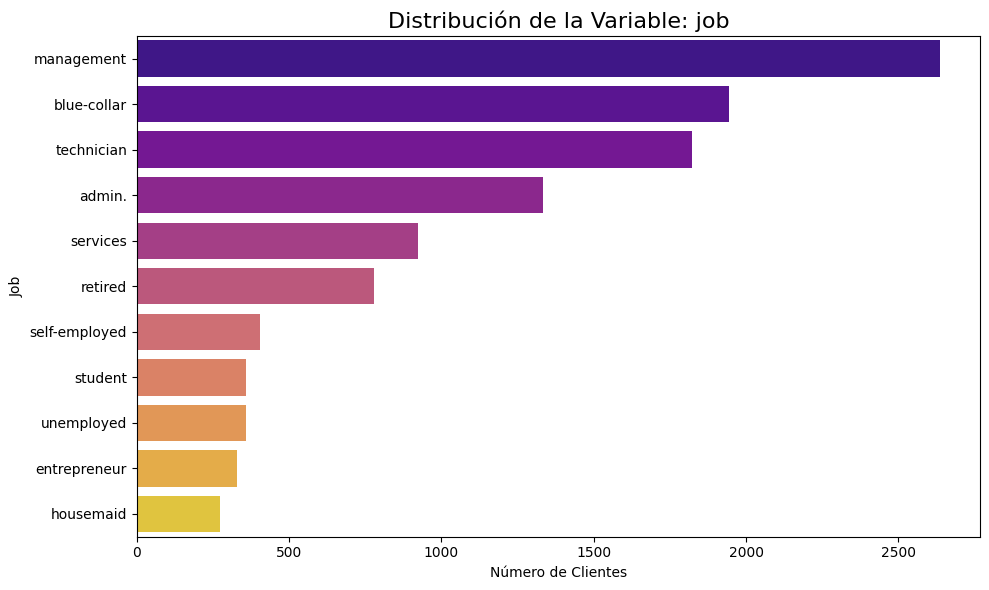

/tmp/ipython-input-4226927667.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=feature, order=df[feature].value_counts().index, palette='plasma')


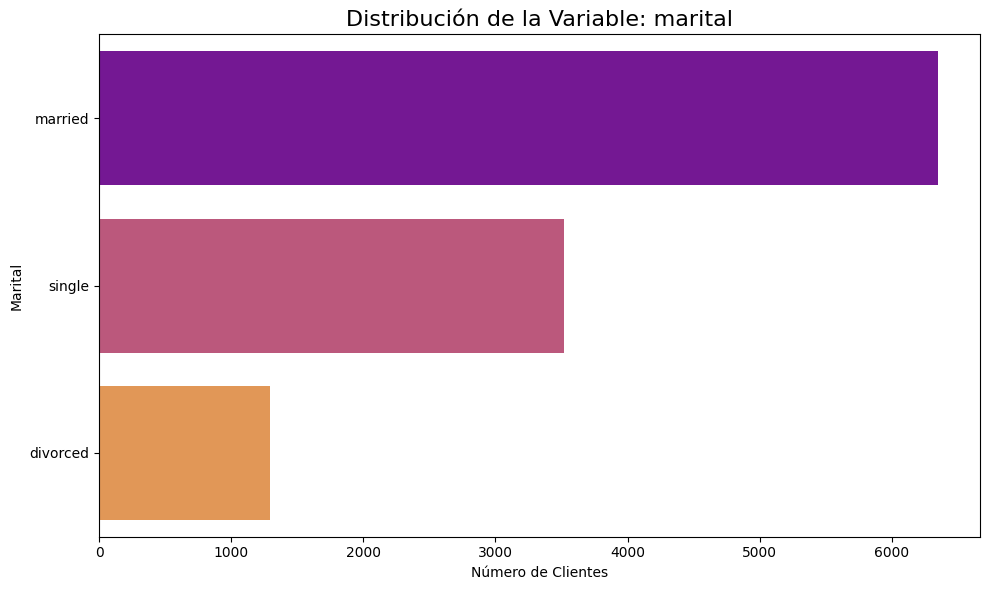

/tmp/ipython-input-4226927667.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=feature, order=df[feature].value_counts().index, palette='plasma')


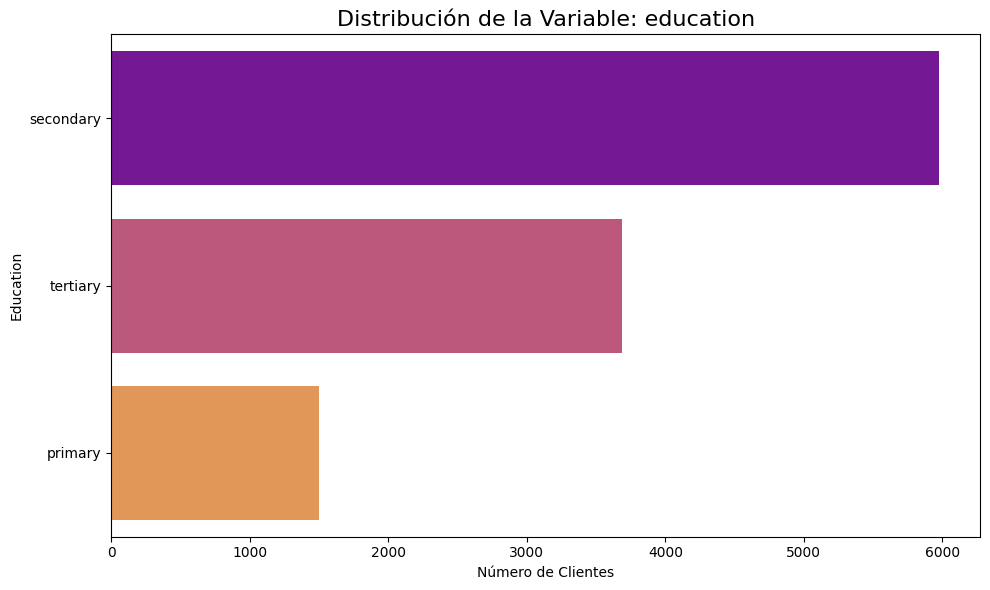

/tmp/ipython-input-4226927667.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=feature, order=df[feature].value_counts().index, palette='plasma')


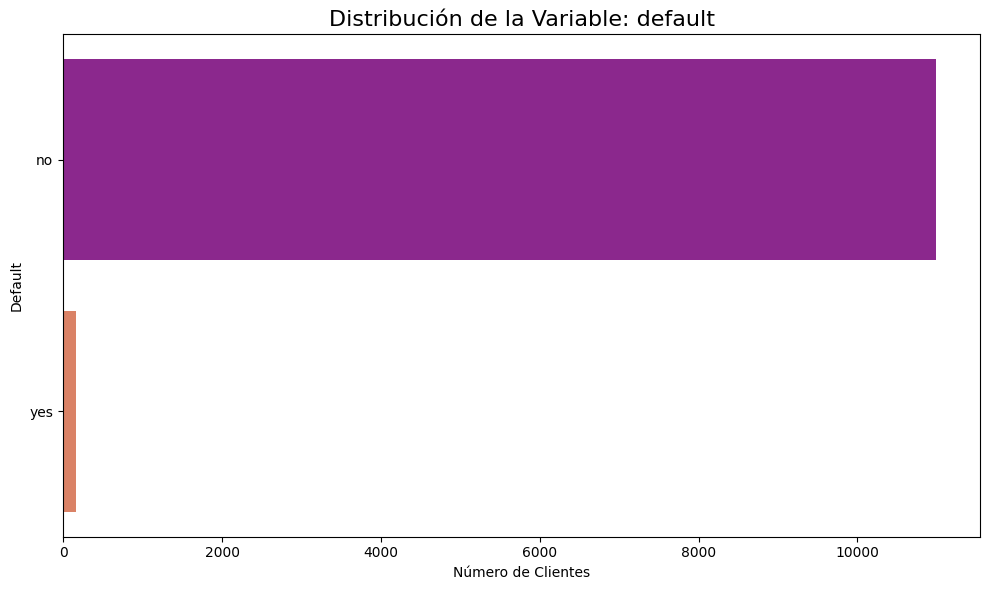

/tmp/ipython-input-4226927667.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=feature, order=df[feature].value_counts().index, palette='plasma')


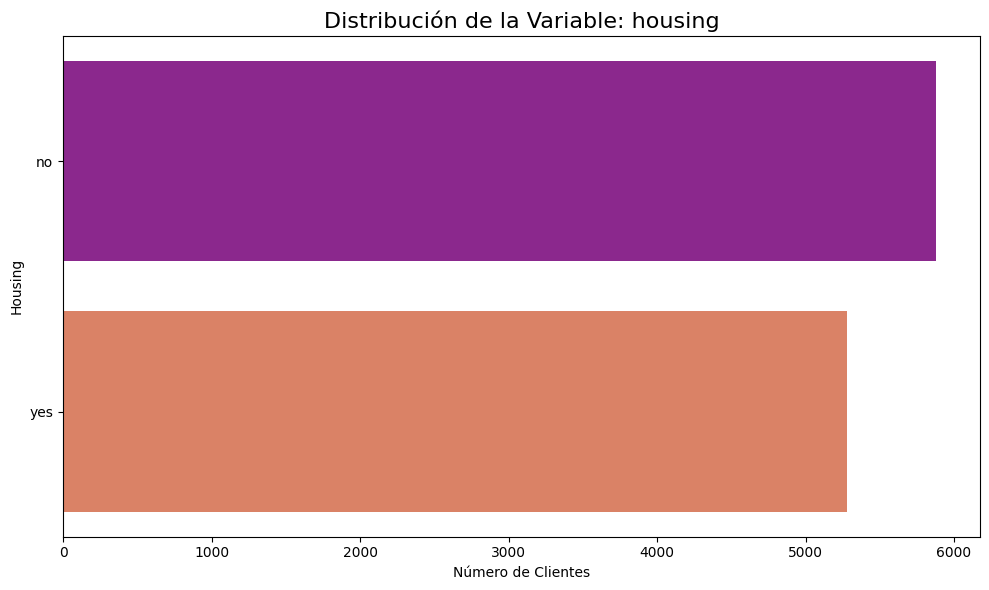

/tmp/ipython-input-4226927667.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=feature, order=df[feature].value_counts().index, palette='plasma')


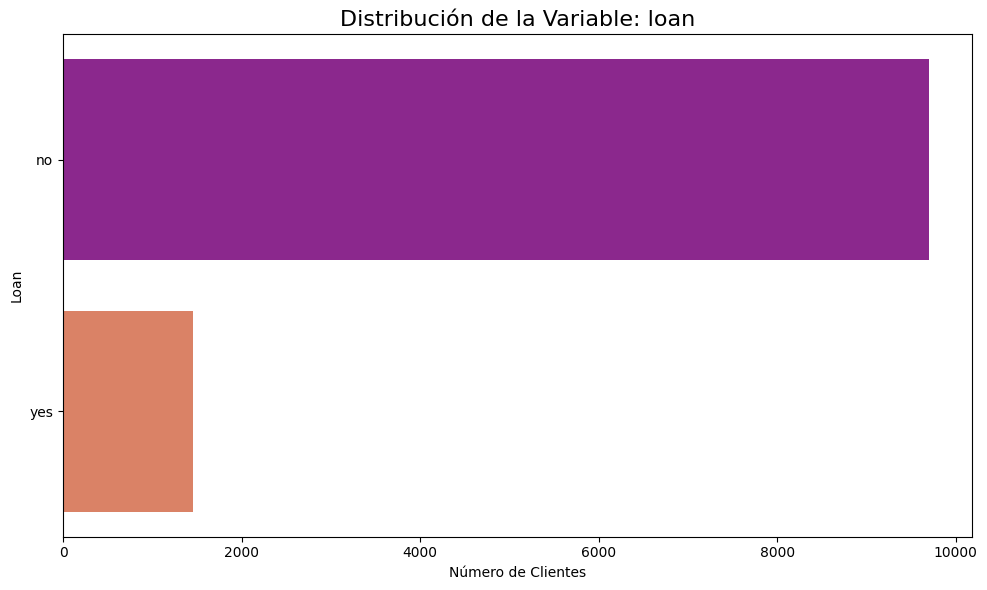

/tmp/ipython-input-4226927667.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=feature, order=df[feature].value_counts().index, palette='plasma')


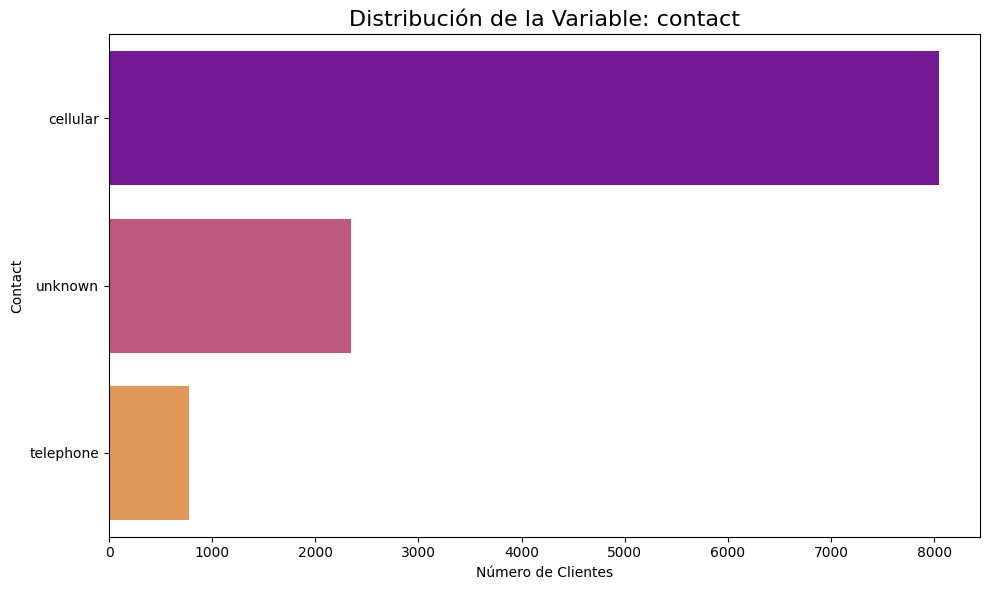

/tmp/ipython-input-4226927667.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=feature, order=df[feature].value_counts().index, palette='plasma')


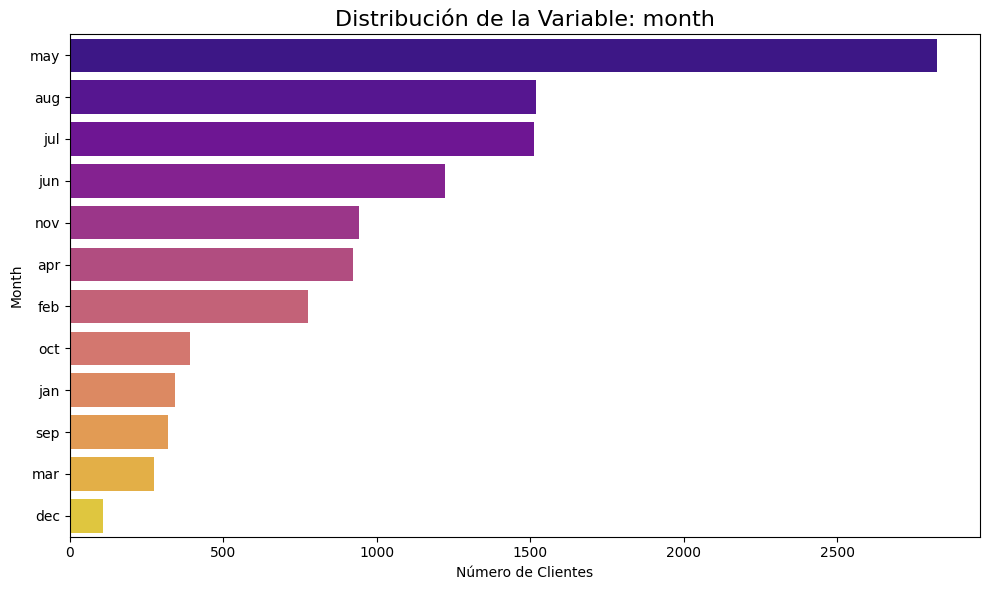

/tmp/ipython-input-4226927667.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=feature, order=df[feature].value_counts().index, palette='plasma')


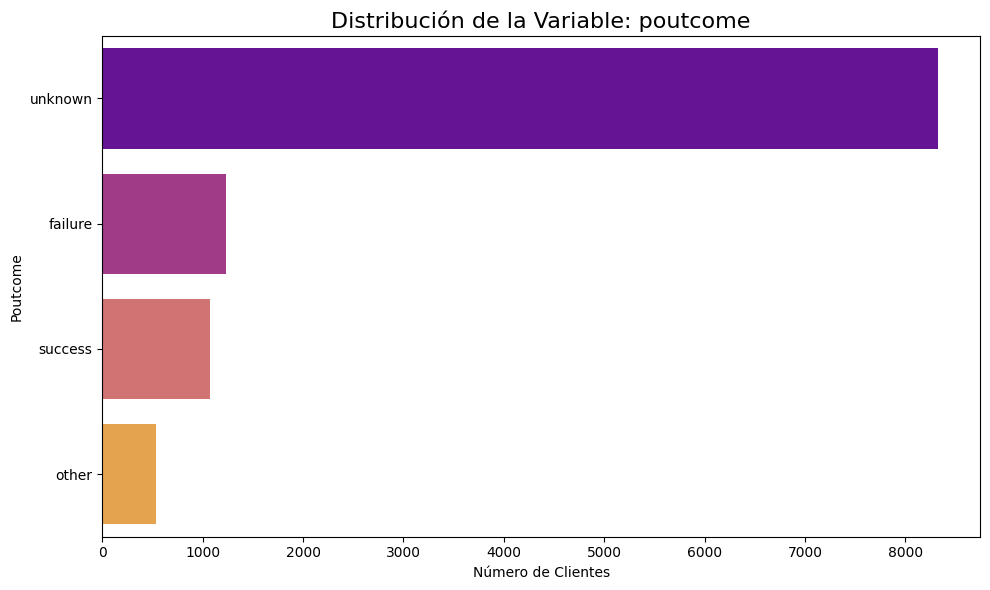

In [67]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Creamos un gráfico de barras para cada variable
for feature in categorical_features:
    plt.figure(figsize=(10, 6))

    # countplot: para ver frecuencia de cada categoría
    sns.countplot(data=df, y=feature, order=df[feature].value_counts().index, palette='plasma')

    plt.title(f'Distribución de la Variable: {feature}', fontsize=16)
    plt.xlabel('Número de Clientes')
    plt.ylabel(feature.capitalize())
    plt.tight_layout()
    plt.show()

### Análisis Bivariado

Esté análisis nos ayudara a encontrar los factores clave que afectan el resultado de la campaña

#### Análisis Bivariado para variables categoricas vs. Resultado del Depósito(deposit)

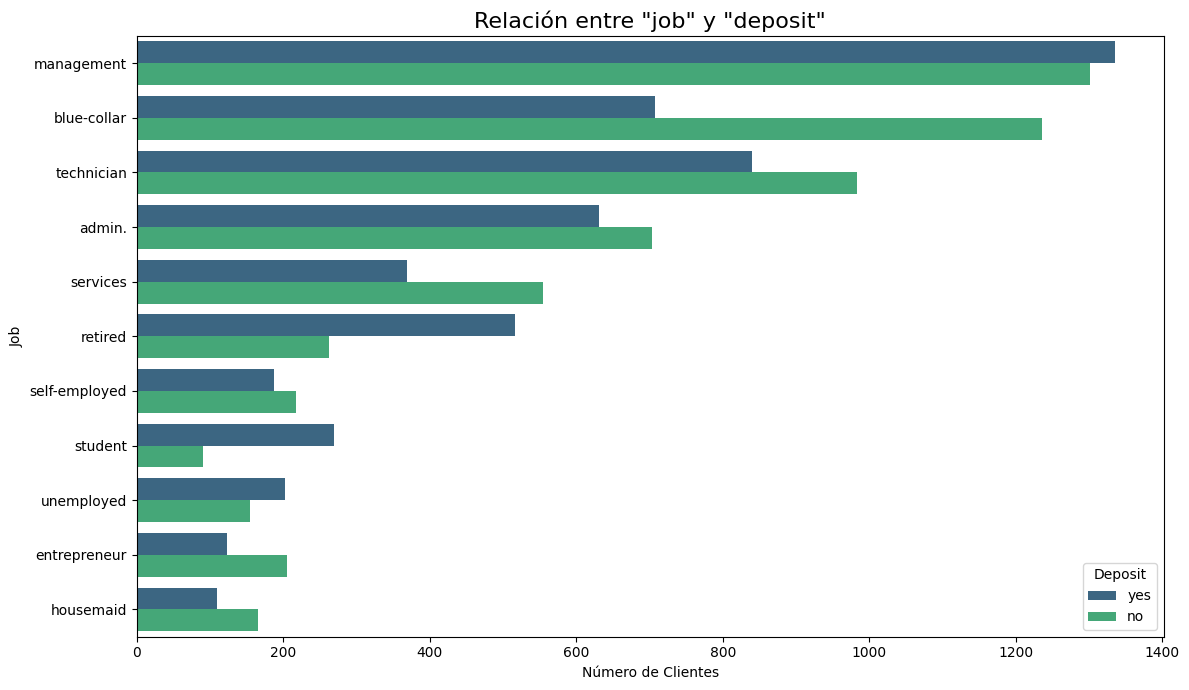

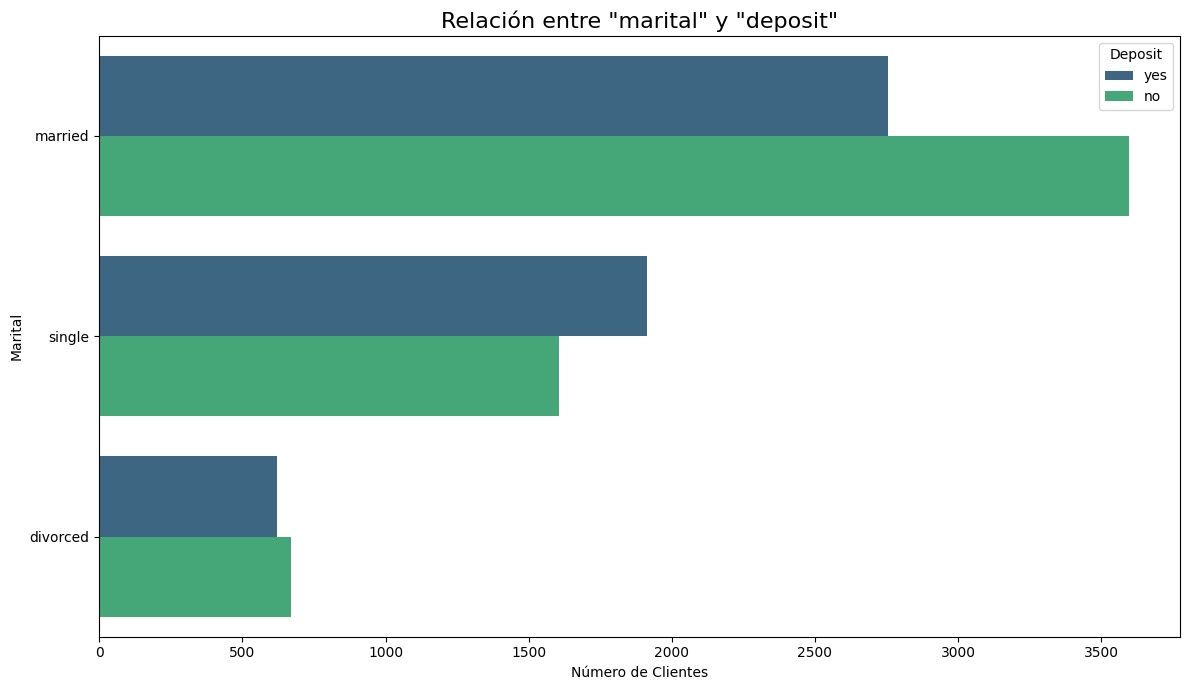

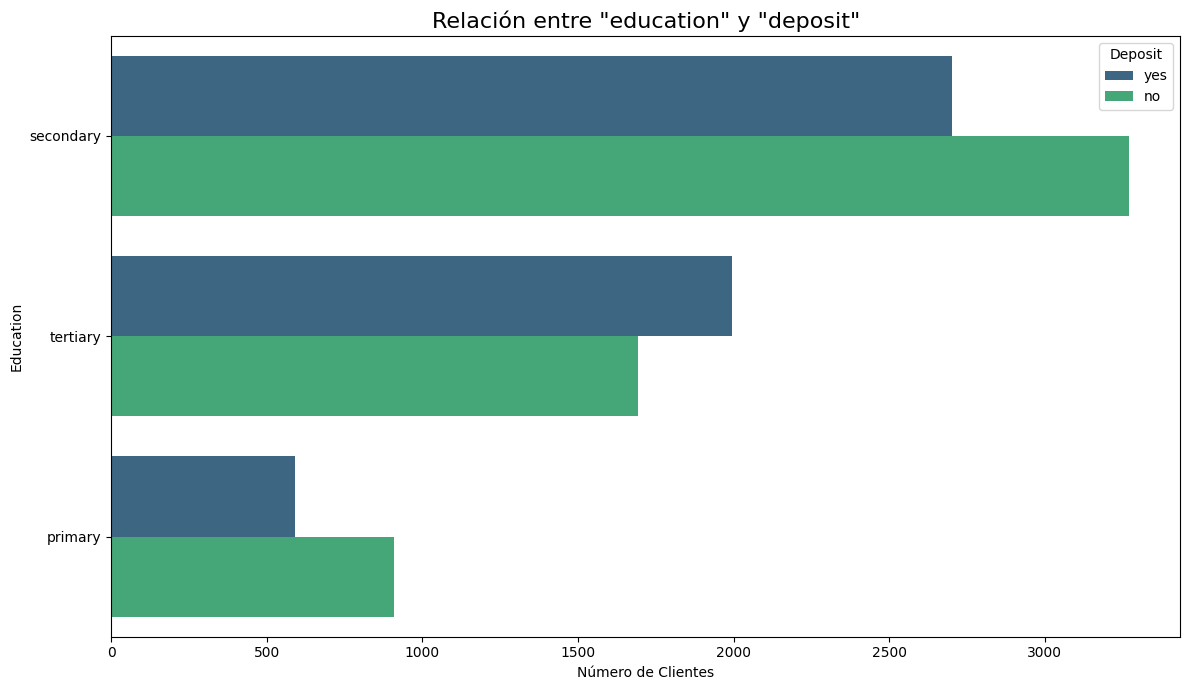

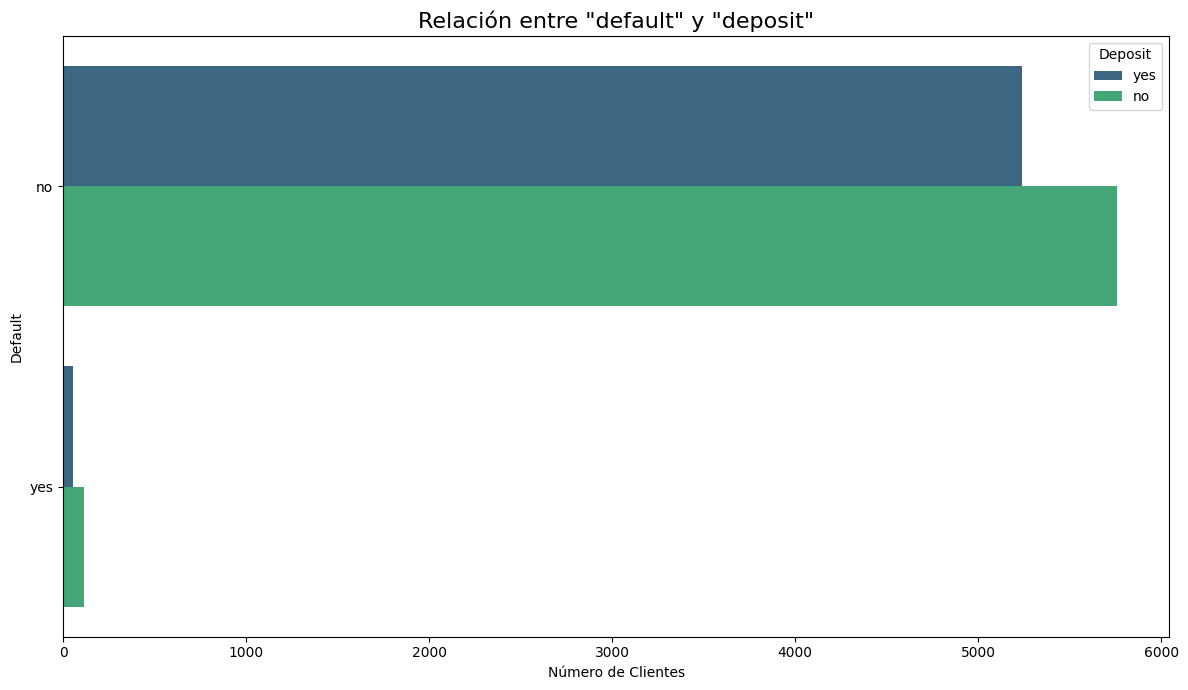

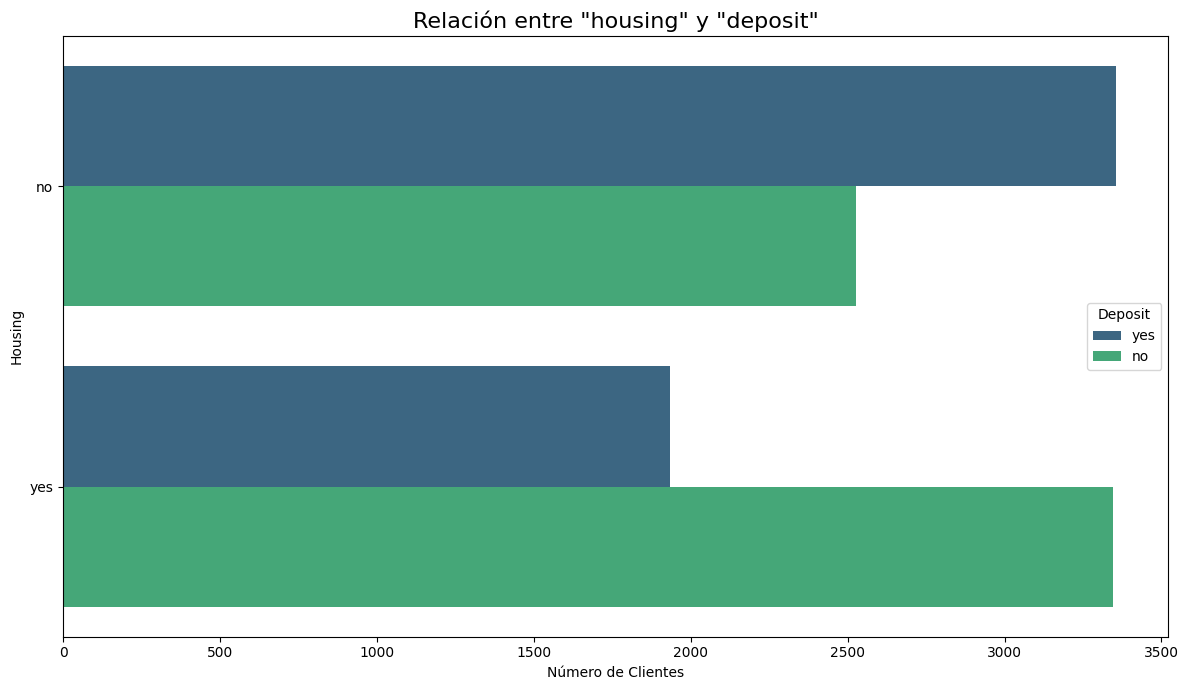

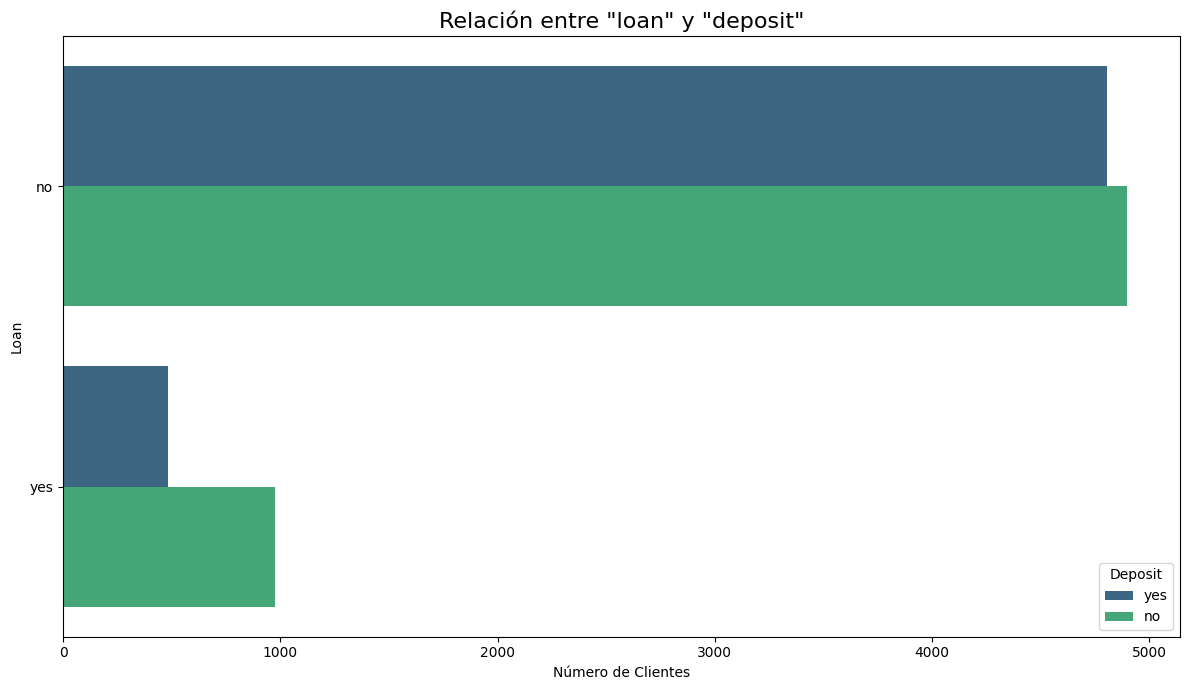

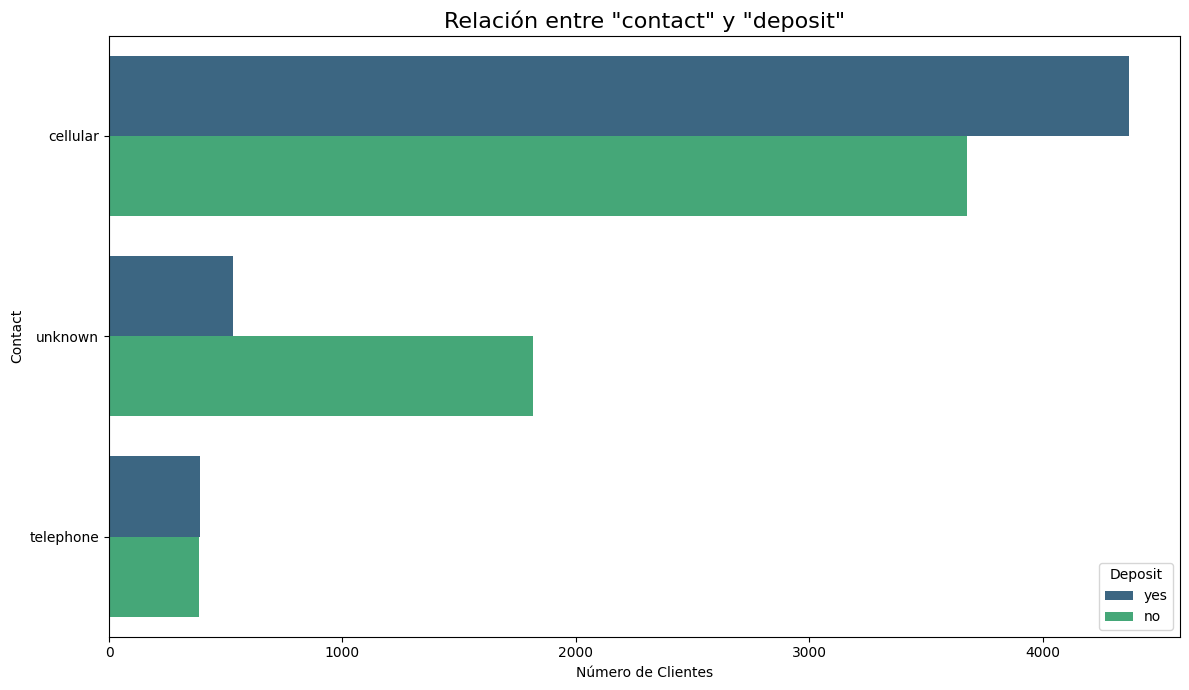

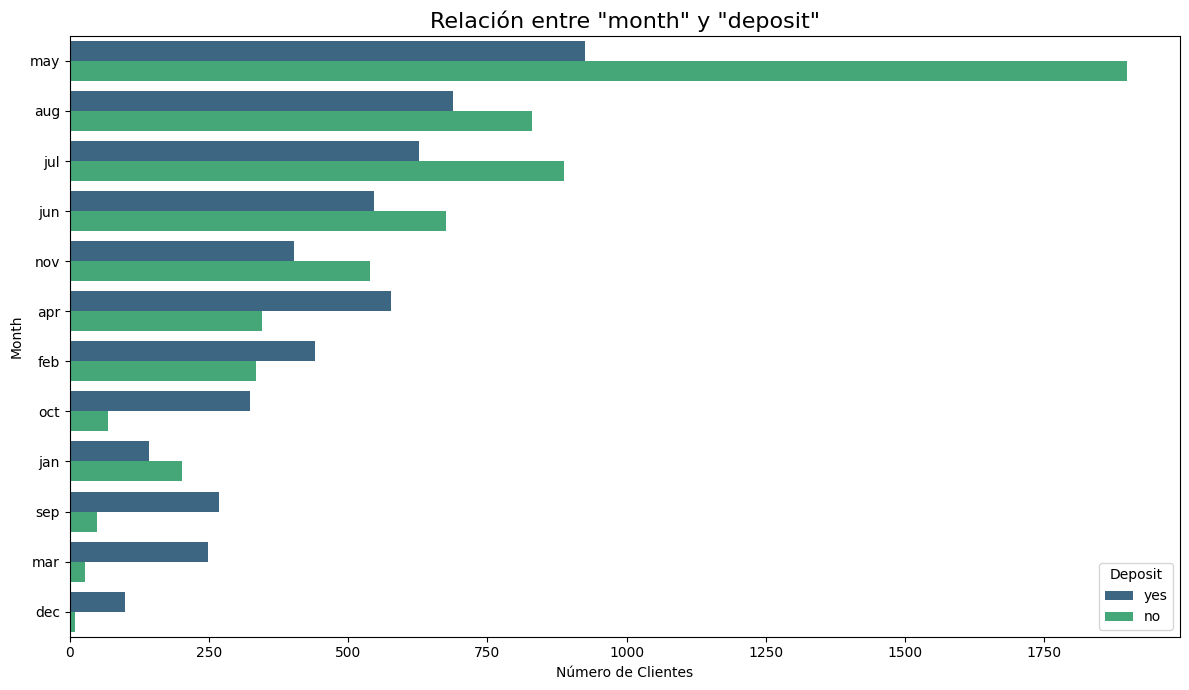

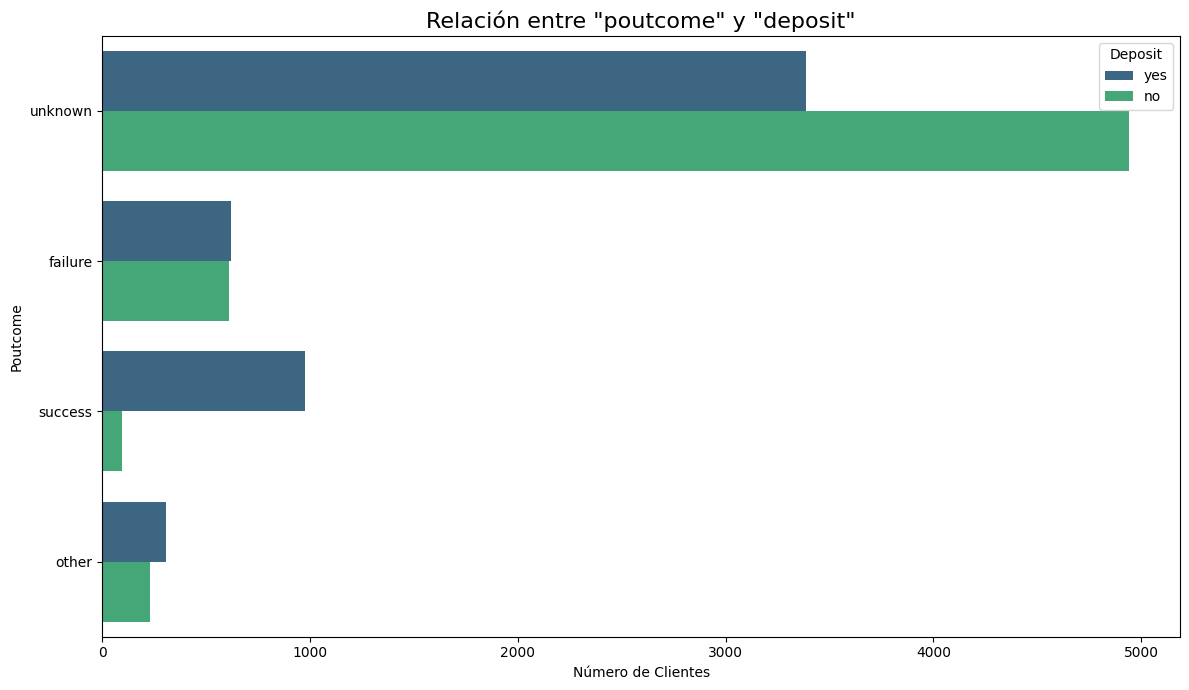

In [68]:
# Lista de las principales columnas categóricas que queremos analizar
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Creamos un gráfico para cada variable categórica
for feature in categorical_features:
    plt.figure(figsize=(12, 7))

    # Usamos countplot de seaborn para comparar la categoría con el resultado 'deposit'

    sns.countplot(data=df, y=feature, hue='deposit', palette='viridis', order=df[feature].value_counts().index)

    plt.title(f'Relación entre "{feature}" y "deposit"', fontsize=16)
    plt.xlabel('Número de Clientes')
    plt.ylabel(feature.capitalize())
    plt.legend(title='Deposit')
    plt.tight_layout()
    plt.show()

Interpretaciones:

1. Gráfico de job: El tipo de trabajo influye. Gerentes, estudiantes, jubilados y desempleados son los más propensos a decirle "sí" a la campaña.

2. Gráfico de marital: Las personas solteras tienen mayor probabilidad de aceptar la campaña, mientras que las personas casadas o divorciadas tienden a negarse.

3. Gráfico de education: Las personas con educación superior tienen mayor probabilidad de aceptar la campaña, mientras que las que solo hicieron primaria o secundaria tienen mayor probabilidad de negarse.

4. Gráfico de default: (si alguna vez ha caído en mora con un crédito): Este grafico no nos brinda informacion para el analisis ya que independiente de si la persona ha estado en mora, se han negado mayormente a la campaña

5. Gráfico de housing (Préstamo de Vivienda): La barra para los clientes que no tienen un préstamo de vivienda (housing = 'no') tiene una mayor proporción de decir "sí" al depósito, mientras que los clientes que sí lo tienen tienden a negarse al depósito.

5. Gráfico de loan (Indica si el cliente tiene un préstamo personal): En este vemos cómo los clientes que ya tienen un préstamo personal con el banco tienden a negarse a la campaña.

6. Gráfico de contact (Método de Contacto): La cantidad de "sí" en la barra de cellular es mayor que en la de telephone, por lo que contactar a los clientes por el móvil es mucho más efectivo.

7. Gráfico de month: (El mes donde se realizó el contacto sobre la campaña): El mes de mayo fue, por mucho, el de mayor actividad. Se contactó al mayor número de clientes en este mes. Le siguen, con bastante menos volumen, julio, agosto y junio y hubo muy poca actividad en diciembre, marzo y septiembre. Estos fueron los meses con la menor cantidad de contactos.

8. Gráfico de poutcome (Resultado de la Campaña Anterior): La barra de la categoría success muestra que casi todos los clientes que anteriormente aceptaron la campaña también le dijeron "sí" al depósito.

####Análisis Bivariado para variables Continuas vs. Resultado del Depósito(deposit)

Al realizar el análisis bivariado inicial para las variables balance, duration y campaign note que los valores atípicos, aunque representan datos válidos de los clientes, comprimen la visualización del boxplot. Esto dificulta la interpretación del rango intercuartílico donde se encuentra la mayoría de los clientes.

Para solucionar esto y poder analizar la distribución de la mayoría de los clientes, genere otros gráficos con el eje 'y' limitado al rango donde se concentran de los datos.

Análisis para age


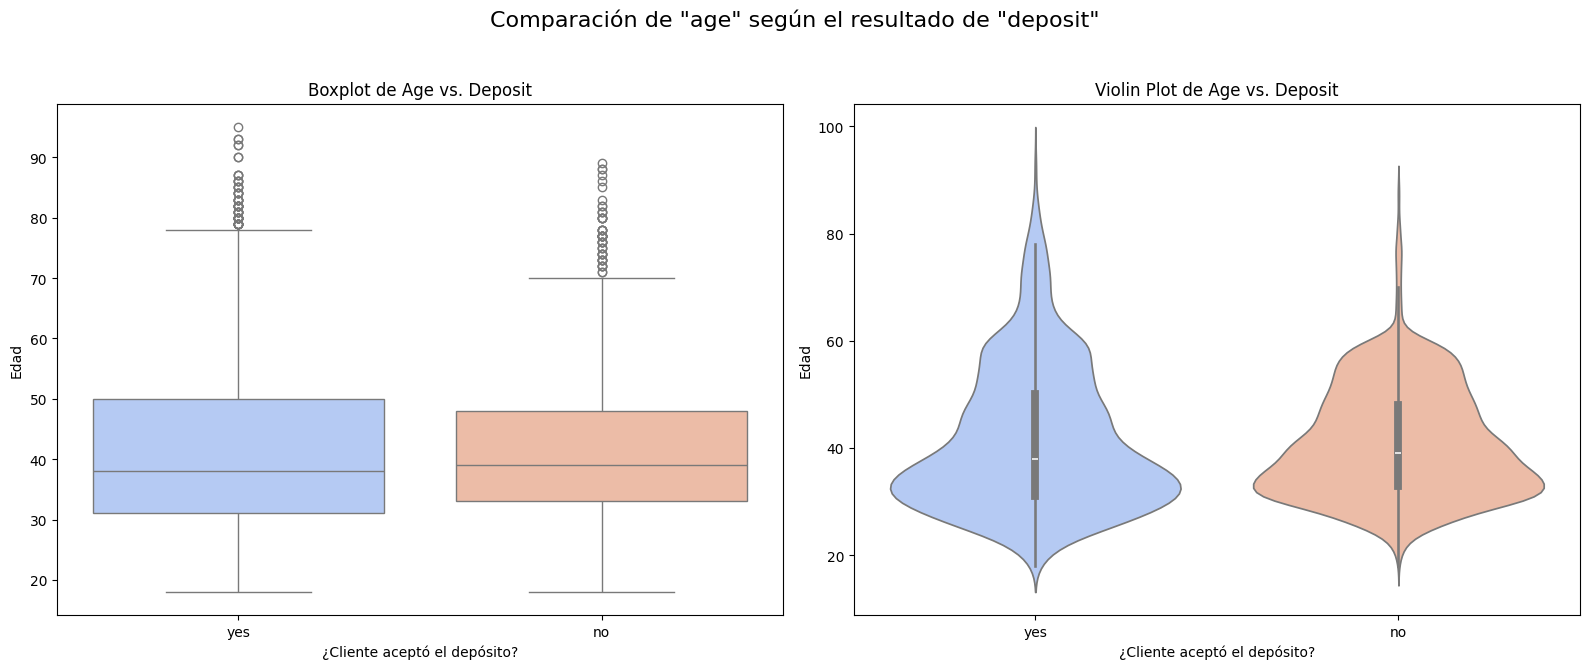

In [69]:

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Comparación de "age" según el resultado de "deposit"', fontsize=16)

# Boxplot para 'age'
sns.boxplot(ax=axes[0], data=df, x='deposit', y='age', hue='deposit', palette='coolwarm')
axes[0].set_title('Boxplot de Age vs. Deposit')
axes[0].set_xlabel('¿Cliente aceptó el depósito?')
axes[0].set_ylabel('Edad')

# Violin Plot para 'age'
sns.violinplot(ax=axes[1], data=df, x='deposit', y='age', hue='deposit',palette='coolwarm')
axes[1].set_title('Violin Plot de Age vs. Deposit')
axes[1].set_xlabel('¿Cliente aceptó el depósito?')
axes[1].set_ylabel('Edad')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

La edad, por sí sola, no parece ser un factor decisivo para aceptar la campaña. El banco tiene éxito con clientes de un rango de edad bastante amplio y similar al de los clientes que rechazan la oferta.

Análisis Comparativo para balance

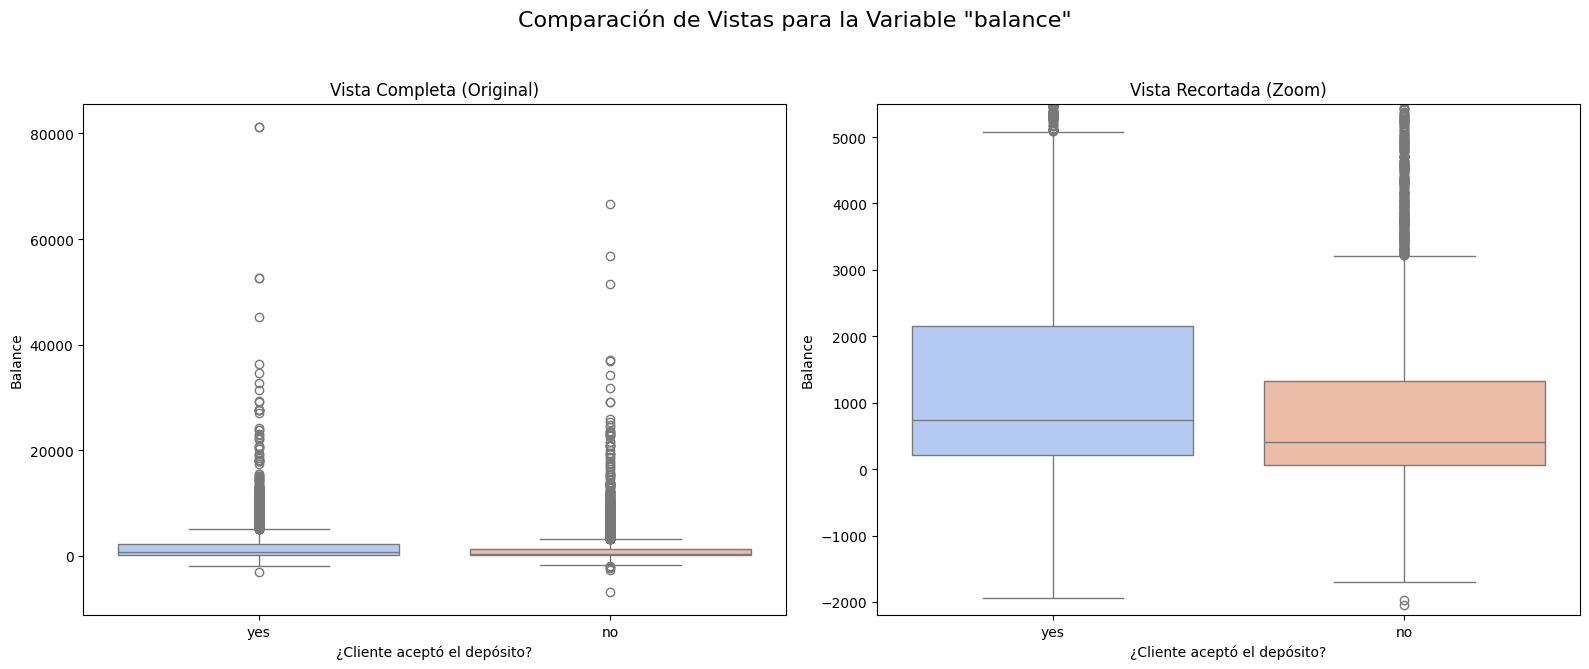

In [70]:

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Comparación de Vistas para la Variable "balance"', fontsize=16)

# Gráfico 1: Vista Completa con Atípicos
sns.boxplot(ax=axes[0], data=df, x='deposit', y='balance', hue='deposit', palette='coolwarm')
axes[0].set_title('Vista Completa (Original)')
axes[0].set_xlabel('¿Cliente aceptó el depósito?')
axes[0].set_ylabel('Balance')

# Gráfico 2: Vista Recortada (Zoom)
sns.boxplot(ax=axes[1], data=df, x='deposit', y='balance', hue='deposit', palette='coolwarm')
axes[1].set_title('Vista Recortada (Zoom)')
axes[1].set_xlabel('¿Cliente aceptó el depósito?')
axes[1].set_ylabel('Balance')
axes[1].set_ylim(-2200, 5500) # Aplicamos el zoom

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

La vista completa del gráfico confirma la presencia de clientes con saldos muy altos. Al hacer zoom en la vista recortada, se observa que la mediana del balance para los clientes que aceptan la campaña ('yes') es ligeramente superior a la de aquellos que la rechazan ('no'), aunque la diferencia no es muy pronunciada.

Análisis Comparativo para duration

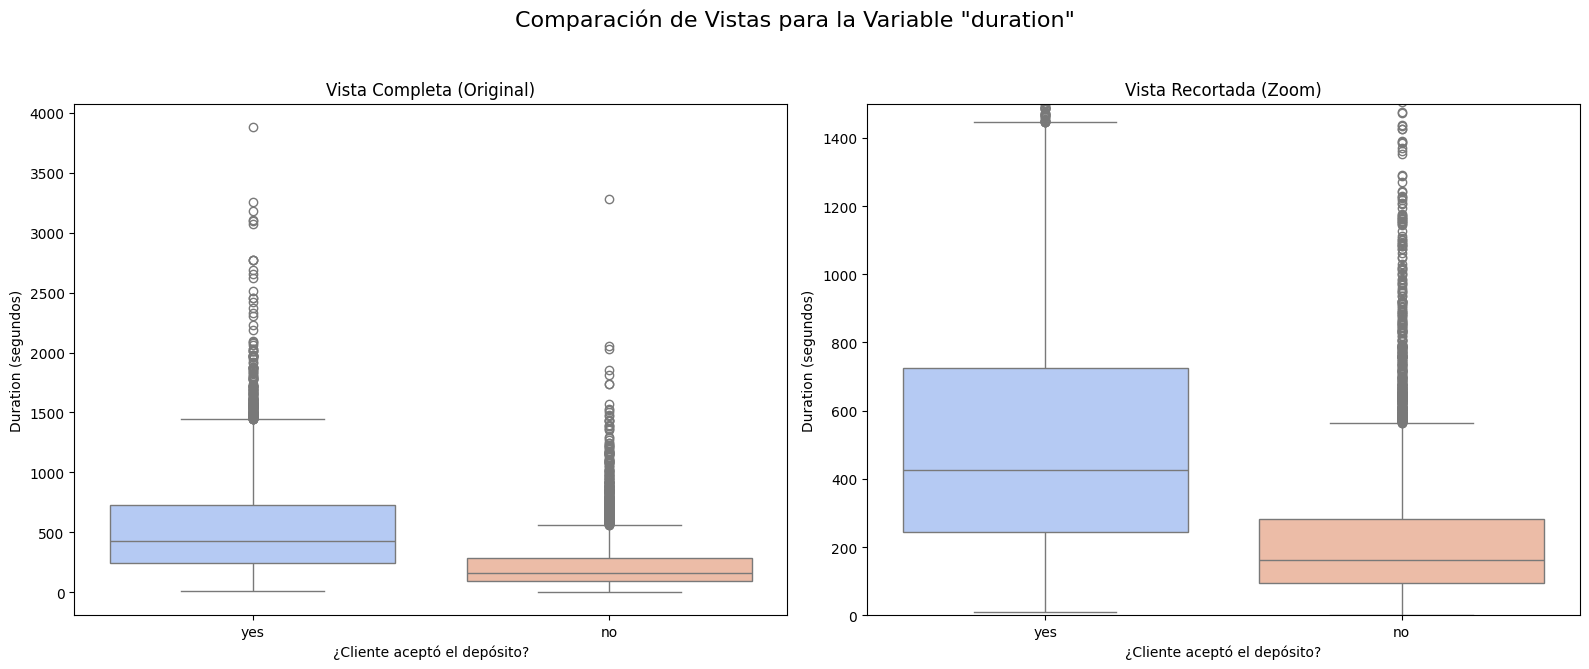

In [71]:

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Comparación de Vistas para la Variable "duration"', fontsize=16)

# Gráfico 1: Vista Completa con Atípicos
sns.boxplot(ax=axes[0], data=df, x='deposit', y='duration', hue='deposit',  palette='coolwarm')
axes[0].set_title('Vista Completa (Original)')
axes[0].set_xlabel('¿Cliente aceptó el depósito?')
axes[0].set_ylabel('Duration (segundos)')

# Gráfico 2: Vista Recortada (Zoom)
sns.boxplot(ax=axes[1], data=df, x='deposit', y='duration', hue='deposit', palette='coolwarm')
axes[1].set_title('Vista Recortada (Zoom)')
axes[1].set_xlabel('¿Cliente aceptó el depósito?')
axes[1].set_ylabel('Duration (segundos)')
axes[1].set_ylim(0, 1500) # Aplicamos el zoom

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Al recortar la vista confirmamos con mayor claridad que la duración de la llamada influye bastante en que los clientes acepten la campaña

Análisis Comparativo para campaign

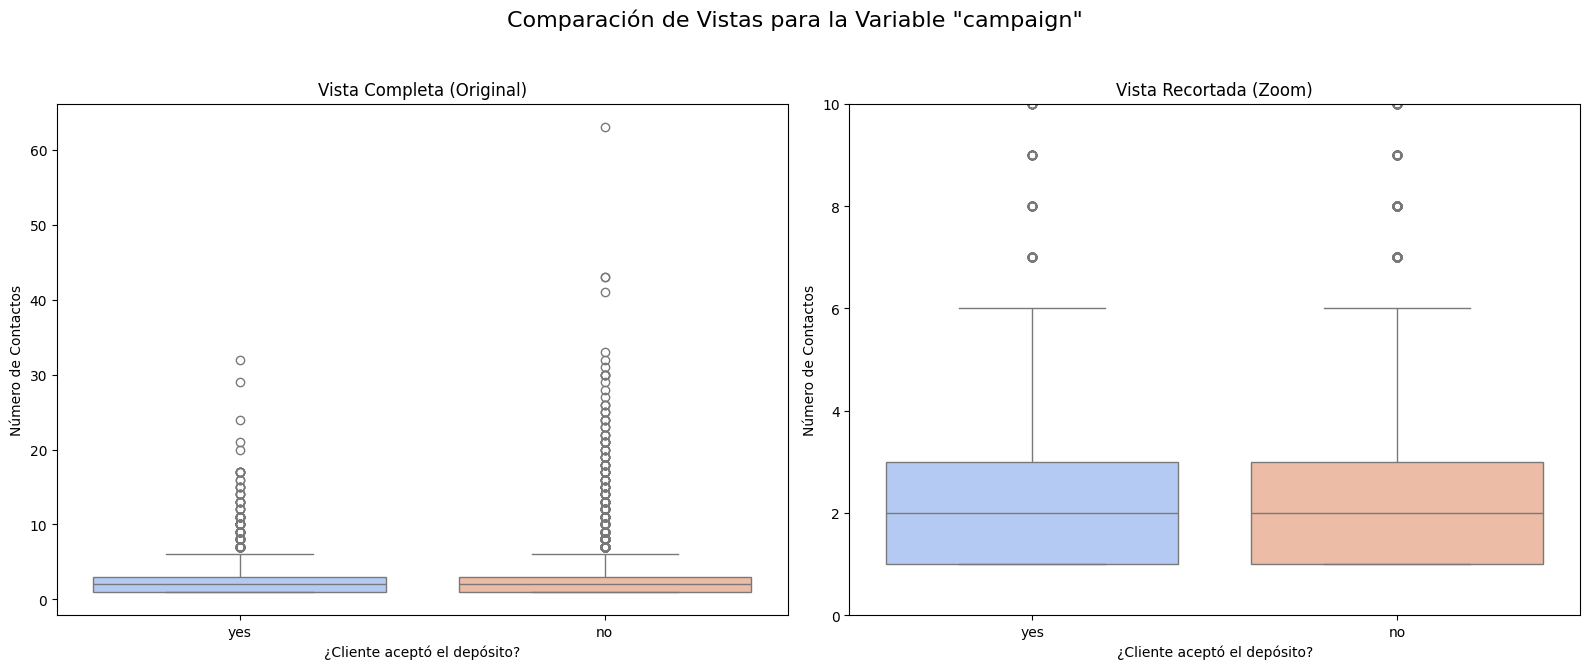

In [72]:
# --- Análisis Comparativo para 'campaign' ---

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Comparación de Vistas para la Variable "campaign"', fontsize=16)

# Gráfico 1: Vista Completa con Atípicos
sns.boxplot(ax=axes[0], data=df, x='deposit', y='campaign', hue='deposit', palette='coolwarm')
axes[0].set_title('Vista Completa (Original)')
axes[0].set_xlabel('¿Cliente aceptó el depósito?')
axes[0].set_ylabel('Número de Contactos')

# Gráfico 2: Vista Recortada (Zoom)
sns.boxplot(ax=axes[1], data=df, x='deposit', y='campaign', hue='deposit', palette='coolwarm')
axes[1].set_title('Vista Recortada (Zoom)')
axes[1].set_xlabel('¿Cliente aceptó el depósito?')
axes[1].set_ylabel('Número de Contactos')
axes[1].set_ylim(0, 10) # Aplicamos el zoom

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

En esta observamos como el numero de contactos realizados durante esta campaña no influye en si el cliente  acepto la oferta del banco

Análisis Comparativo para previous


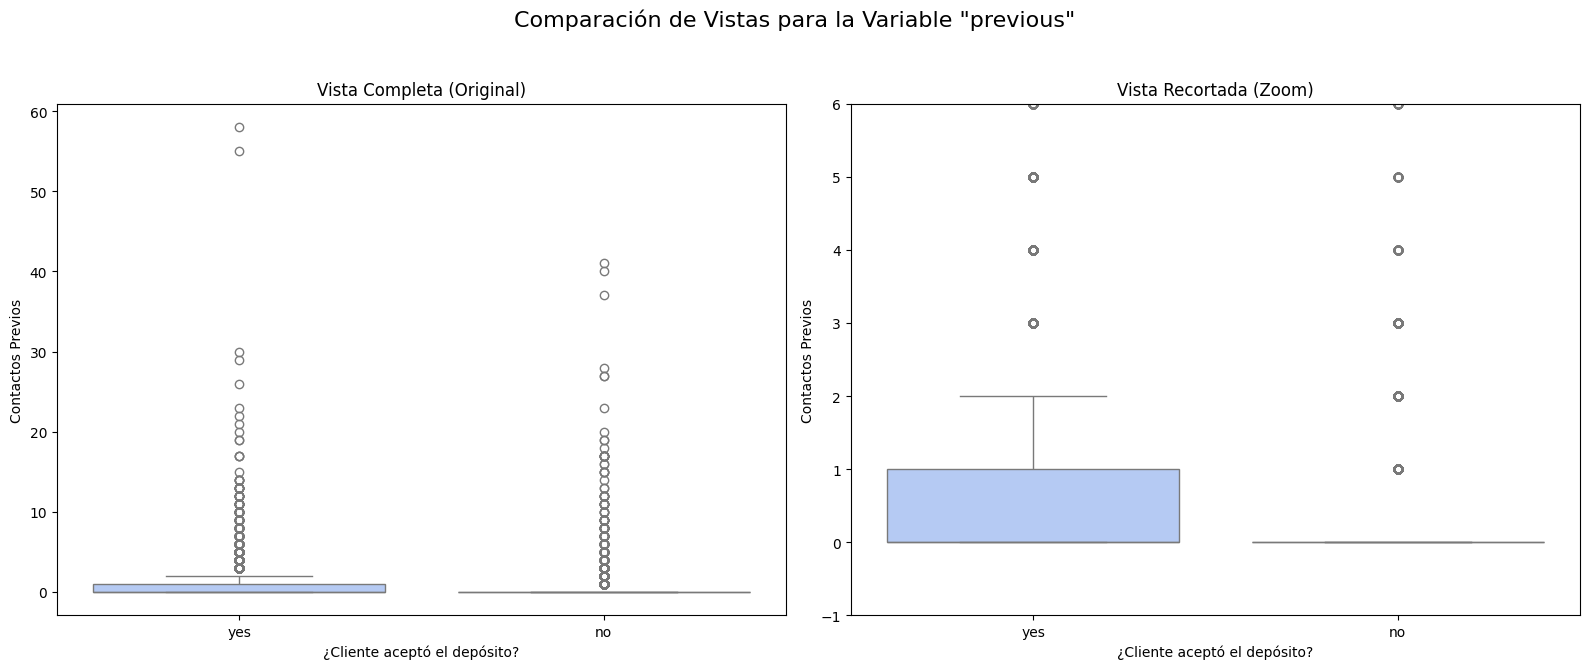

In [73]:
# --- Análisis Comparativo para 'previous' ---

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Comparación de Vistas para la Variable "previous"', fontsize=16)

# Gráfico 1: Vista Completa con Atípicos
sns.boxplot(ax=axes[0], data=df, x='deposit', y='previous', hue='deposit', palette='coolwarm')
axes[0].set_title('Vista Completa (Original)')
axes[0].set_xlabel('¿Cliente aceptó el depósito?')
axes[0].set_ylabel('Contactos Previos')

# Gráfico 2: Vista Recortada (Zoom)
sns.boxplot(ax=axes[1], data=df, x='deposit', y='previous', hue='deposit', palette='coolwarm')
axes[1].set_title('Vista Recortada (Zoom)')
axes[1].set_xlabel('¿Cliente aceptó el depósito?')
axes[1].set_ylabel('Contactos Previos')
axes[1].set_ylim(-1, 6) # Aplicamos el zoom

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

El hallazgo más notable es que para el grupo que rechazó la oferta ('no'), la "caja" del boxplot está colapsada en cero. Esto indica que la inmensa mayoría de estos clientes nunca habían sido contactados antes. En cambio, para el grupo que aceptó la oferta ('yes'), aunque la mediana también es baja, el rango de la caja es más amplio y ligeramente superior

en conclusion, tener un historial de contactos previos, aunque sea leve, se asocia positivamente con la probabilidad de aceptar la campaña.

Análisis para Pdays

Primero, se compara la tasa de éxito general entre Clientes Nuevos (pdays = -1) y Clientes Recurrentes (pdays > 0).

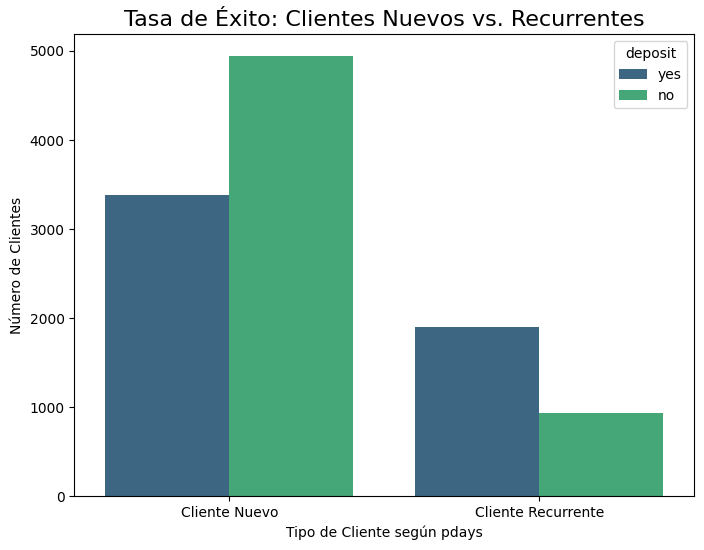

In [74]:
# --- Análisis de 'pdays' (Parte 1): Nuevos vs. Recurrentes ---

# Creamos una columna temporal para categorizar a los clientes
df['tipo_cliente_pdays'] = df['pdays'].apply(lambda x: 'Cliente Nuevo' if x == -1 else 'Cliente Recurrente')

# Creamos el gráfico de barras comparativo
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='tipo_cliente_pdays', hue='deposit', palette='viridis')
plt.title('Tasa de Éxito: Clientes Nuevos vs. Recurrentes', fontsize=16)
plt.xlabel('Tipo de Cliente según pdays')
plt.ylabel('Número de Clientes')
plt.show()

Luego, se analice únicamente al grupo de Clientes Recurrentes para determinar si el tiempo transcurrido desde el último contacto influye en su decisión.

/tmp/ipython-input-1056964268.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clientes_recurrentes, x='deposit', y='pdays', palette='coolwarm')


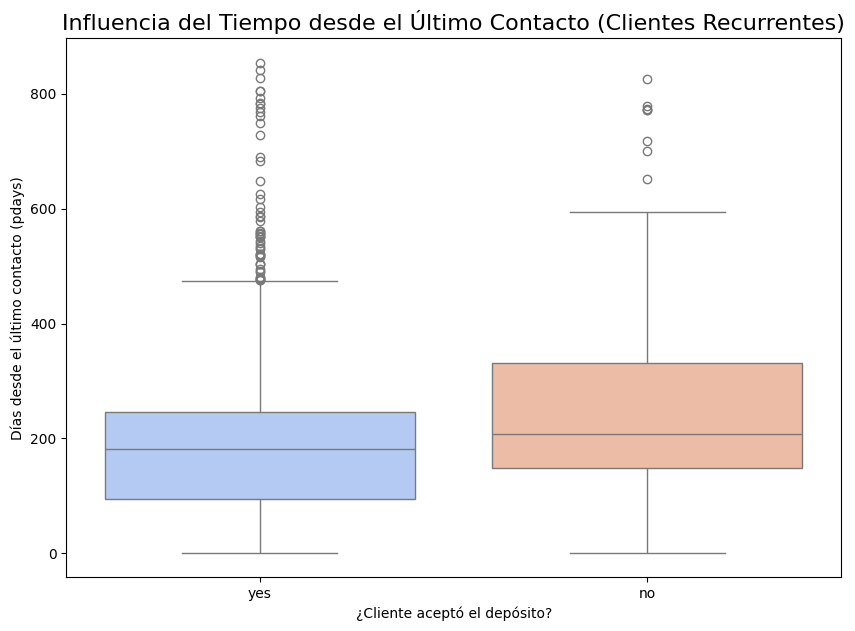

In [75]:
# --- Análisis de 'pdays' (Parte 2): Solo para Clientes Recurrentes ---

# Filtramos el dataframe para quedarnos solo con los clientes recurrentes
clientes_recurrentes = df[df['pdays'] != -1]

# Creamos el boxplot para este subgrupo
plt.figure(figsize=(10, 7))
sns.boxplot(data=clientes_recurrentes, x='deposit', y='pdays', palette='coolwarm')
plt.title('Influencia del Tiempo desde el Último Contacto (Clientes Recurrentes)', fontsize=16)
plt.xlabel('¿Cliente aceptó el depósito?')
plt.ylabel('Días desde el último contacto (pdays)')
plt.show()

La primera grafica muestran qque los clientes recurrentes (contactados antes) aceptan la oferta con mucha más frecuencia que los clientes nuevos y la segunda grafica muetra que para esos clientes recurrentes, el éxito es mayor cuando se les contacta más recientemente.

###Análisis multivariado

 #### Matriz de correlación

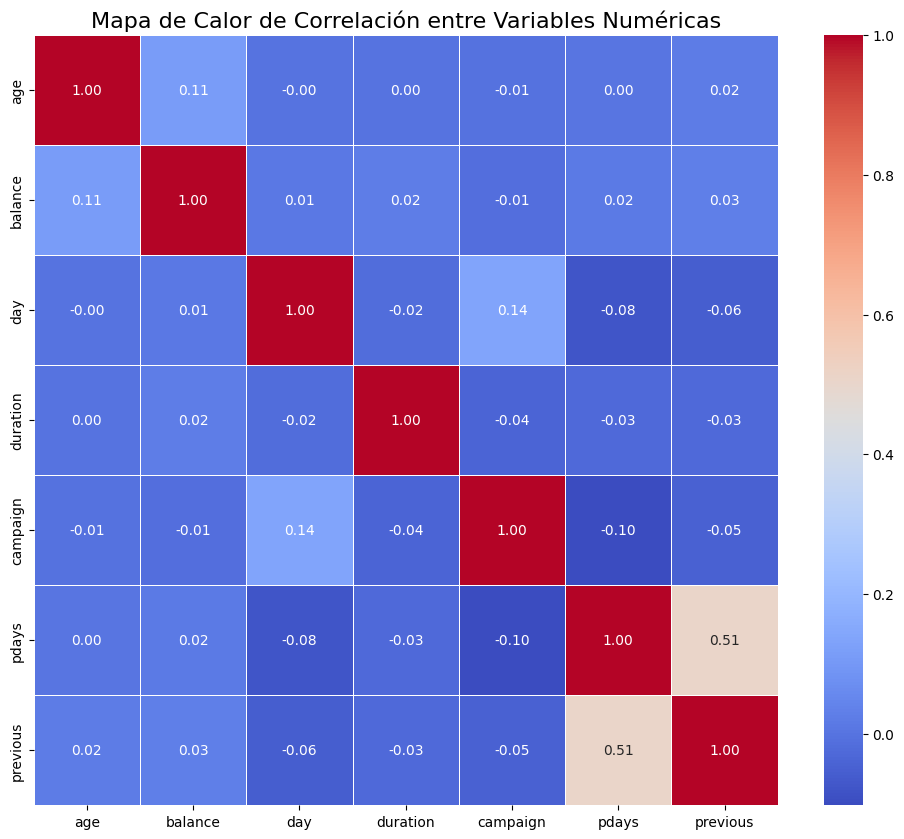

In [76]:

# Seleccione solo las columnas numéricas para el análisis de correlación
numeric_df = df.select_dtypes(include=np.number)

# Calculo de la matriz de correlación
correlation_matrix = numeric_df.corr()

# se crea el mapa de calor para visualizar la matriz
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de Calor de Correlación entre Variables Numéricas', fontsize=16)
plt.show()

La matriz de correlación revela que no existen relaciones lineales fuertes entre la mayoría de las variables numéricas, indicando que cada una aporta información distinta. La única correlación moderada se encuentra entre pdays y previous (0.51), lo cual es esperado, ya que un mayor número de contactos previos suele implicar más tiempo desde la última interacción. Adicionalmente, se observa una correlación positiva muy débil entre age y balance (0.11), sugiriendo una leve tendencia a que el saldo aumente con la edad. En general, la ausencia de altas correlaciones (multicolinealidad) es favorable para el análisis.

####Pairplot

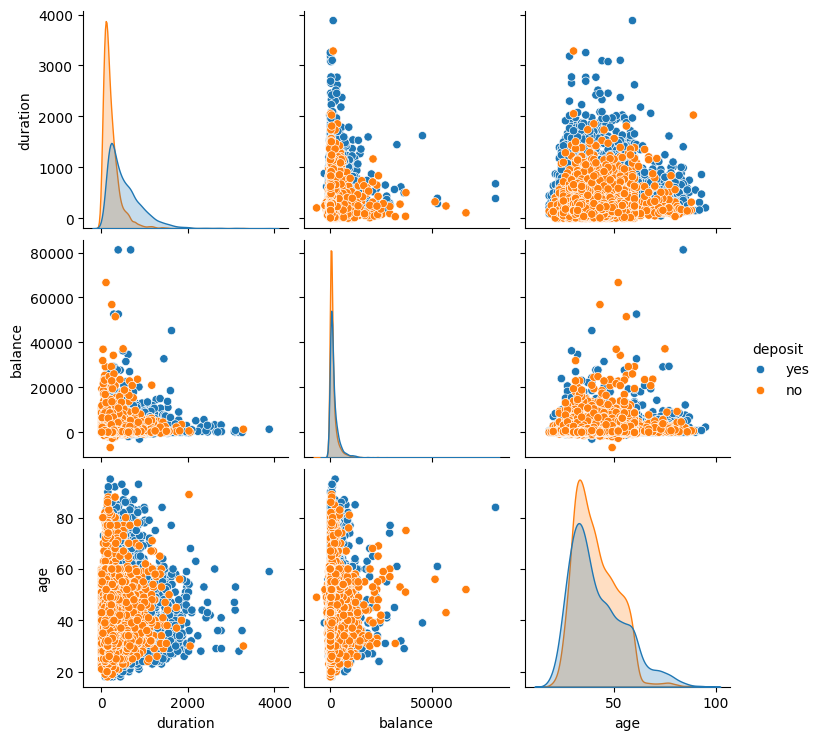

In [52]:
variables_para_pairplot = ['duration', 'balance', 'age', 'deposit']
sns.pairplot(df[variables_para_pairplot], hue='deposit')

El pairplot confirma visualmente los hallazgos anteriores. En la diagonal, la distribución de duration muestra una clara separación entre los clientes que aceptaron la oferta ('yes') y los que no, algo que no ocurre con age y balance.

 Los gráficos de dispersión muestran que aunque no hay clústeres definidos, los valores altos de duration se asocian fuertemente con un resultado positivo.

#Conclusiones Finales

El presente Análisis Exploratorio de Datos tuvo como objetivo identificar los factores clave que influyen en el éxito de las campañas de marketing de depósitos a plazo y tras haber hecho el proceso de limpieza, visualización y análisis, he sacado las siguientes conclusiones:

Duración de la Llamada: Es el indicador más potente de una suscripción. Llamadas más largas se correlacionan directamente con el interés del cliente y un resultado positivo.

Historial del Cliente: El éxito en campañas previas (poutcome) es un predictor determinante. Clientes que ya aceptaron ofertas en el pasado son el segmento con la tasa de conversión más alta.

Canal y Deuda: El contacto vía celular es superior al teléfono fijo. Adicionalmente, los clientes sin deudas hipotecarias o personales (housing/loan) muestran una mayor propensión a suscribirse.

Perfil Sociodemográfico: Ser soltero, tener educación terciaria y ciertos trabajos (ej. gerencia, estudiante) se asocian con una mayor tasa de éxito.

Estrategia de Contacto: Una menor cantidad de contactos durante la campaña (campaign) se asocia con mejores resultados, sugiriendo que la insistencia excesiva tiene resultadoss contraproducentes.

Basado en estos Hallazgos podemos definir un "perfil de cliente ideal" y siertas estrategias de marketing recomendadas:

<h4>Perfil del Cliente Ideal

El cliente con mayor probabilidad de suscribirse es un profesional con educación superior, sin deudas existentes, preferiblemente soltero, que ya ha tenido una interacción exitosa con el banco y es contactado a su teléfono celular en una llamada sustancial.

<h4>Estrategia de Marketing Recomendada

Enfocar los recursos en clientes con un historial de poutcome = 'success' y en los perfiles sociodemográficos identificados como de alta conversión.

Dar prioridad absoluta a las campañas de marketing móvil.

Entrenar a los agentes para que prioricen la calidad y profundidad de la conversación (duration) sobre la cantidad de llamadas.

Establecer un máximo de 2-3 contactos por cliente en una misma campaña para evitar un impacto negativo.